# Project Wine

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('wine.data', header=None)
df.shape

(178, 14)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
cols = [
    'class', 'alcohol', 'malic acid', 'aah', 'alcalinity of ash', 'magnesium',
    'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color inensity',
    'hue', 'diluted wines', 'proline'
]

In [11]:
df.columns = cols
X = df.iloc[:, 1:]
X.head()

,alcohol,malic acid,aah,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color inensity,hue,diluted wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
y = df['class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(n_components=2)

In [23]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [24]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [25]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
alcohol,0.128,-0.493
malic acid,-0.256,-0.190
aah,-0.022,-0.317
alcalinity of ash,-0.244,0.035
magnesium,0.148,-0.262
total phenols,0.385,-0.096
flavanoids,0.420,-0.015
nonflavanoid phenols,-0.299,-0.076
proanthocyanins,0.308,-0.074
color inensity,-0.119,-0.534


In [31]:
# no preconcieved notion of the number of components we want
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA()

In [32]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [33]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

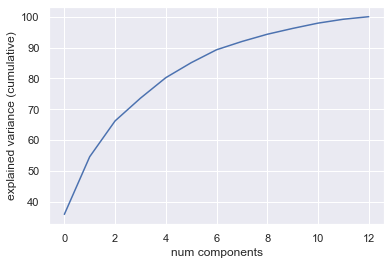

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('num components')
plt.ylabel('explained variance (cumulative)');